<a href="https://colab.research.google.com/github/ChanapatC/Customer-Analytics/blob/main/Basic_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns

In [ ]:
## Import Data
df = pd.read_csv("https://github.com/ChanapatC/Customer-Analytics/raw/main/Customertravel.csv")

# EDA

## Explore Data

In [ ]:
# Understand the dataset structure
print("Number of observations:", len(df))
print("Number of variables:", len(df.columns))

Number of observations: 954
Number of variables: 7


In [ ]:
## Explore Data
df.tail()

,Target,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
949,0,31,Yes,Low Income,1,No,No
950,0,30,No,Middle Income,5,No,Yes
951,0,37,No,Middle Income,4,No,No
952,0,30,No,Low Income,1,Yes,Yes
953,0,31,Yes,High Income,1,No,No


In [ ]:
df.isna().sum()

Target                        0
Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
dtype: int64

In [ ]:
df.describe()

,Target,Age,ServicesOpted
count,954.000000,954.000000,954.000000
mean,0.234801,32.109015,2.437107
std,0.424097,3.337388,1.606233
min,0.000000,27.000000,1.000000
25%,0.000000,30.000000,1.000000
50%,0.000000,31.000000,2.000000
75%,0.000000,35.000000,4.000000
max,1.000000,38.000000,6.000000


In [ ]:
# explore avg of Age, ServiceOpted
# Group by 'Target' and calculate the mean of 'Age' and 'ServicesOpted'
df_by_target = df.groupby(by=['Target']).agg(
    avgAge=('Age', 'mean'),
    avgServicesOpted=('ServicesOpted', 'mean')).reset_index()

# Merge the calculated averages back to the original DataFrame
df = df.merge(df_by_target, on='Target', how='left')




df. tail ()

,Target,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,avgAge,avgServicesOpted
949,0,31,Yes,Low Income,1,No,No,32.352055,2.40274
950,0,30,No,Middle Income,5,No,Yes,32.352055,2.40274
951,0,37,No,Middle Income,4,No,No,32.352055,2.40274
952,0,30,No,Low Income,1,Yes,Yes,32.352055,2.40274
953,0,31,Yes,High Income,1,No,No,32.352055,2.40274


In [ ]:
# Examine variable types
print("Variable types:")
print(df.dtypes)

Variable types:
Target                          int64
Age                             int64
FrequentFlyer                  object
AnnualIncomeClass              object
ServicesOpted                   int64
AccountSyncedToSocialMedia     object
BookedHotelOrNot               object
avgAge                        float64
avgServicesOpted              float64
dtype: object


In [ ]:
#Seperate numerical and categorical variables
numerical_vars = df.select_dtypes(exclude=['object']).iloc[:,1:] #exclude target
categorical_vars = df.select_dtypes(include=['object'])

In [ ]:
desc = df.groupby('Target').describe()
print("Summary statistics of numerical variables by Target Flag:")
for col in numerical_vars:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

Summary statistics of numerical variables by Target Flag:


,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,730.000000,32.352055,3.209323,27.000000,30.000000,31.000000,35.000000,38.000000
1,224.000000,31.316964,3.620133,27.000000,28.000000,30.000000,35.000000,38.000000


,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,730.000000,2.402740,1.554495,1.000000,1.000000,2.000000,3.000000,6.000000
1,224.000000,2.549107,1.763430,1.000000,1.000000,2.000000,4.000000,6.000000


,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,730.000000,32.352055,0.000000,32.352055,32.352055,32.352055,32.352055,32.352055
1,224.000000,31.316964,0.000000,31.316964,31.316964,31.316964,31.316964,31.316964


,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,730.000000,2.402740,0.000000,2.402740,2.402740,2.402740,2.402740,2.402740
1,224.000000,2.549107,0.000000,2.549107,2.549107,2.549107,2.549107,2.549107


## Multivariate analysis


###Cat-Num

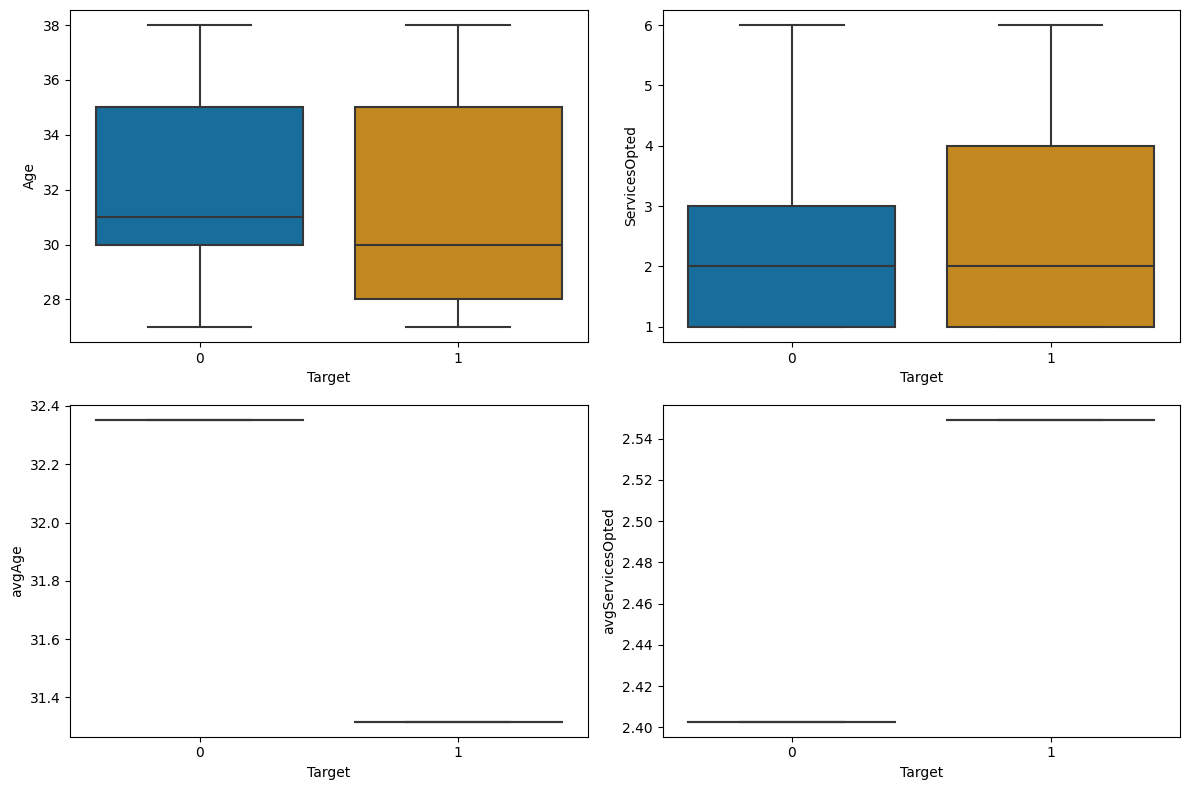

In [ ]:
palette = 'colorblind'
fig, axes = plt.subplots(2,2, figsize=(12,8), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(numerical_vars, axes):
    sns.boxplot(data=df, y=col, x='Target', palette=palette, ax=ax)
plt.show()

In [ ]:
from scipy.stats import ttest_ind, f_oneway

results = []

# Perform t-test and store results
for column in numerical_vars:
    churn_yes = df[df['Target'] == 1][column]
    churn_no = df[df['Target'] == 0][column]
    t_statistic, p_value = ttest_ind(churn_yes, churn_no)
    results.append({'Variable': column, 'Test': 'T-Test', 'Statistic': round(t_statistic, 4), 'P-value': round(p_value, 4)})

# Perform ANOVA and store results
for column in numerical_vars:
    groups = []
    for churn_value in df['Target'].unique():
        groups.append(df[df['Target'] == churn_value][column])
    f_statistic, p_value = f_oneway(*groups)
    results.append({'Variable': column, 'Test': 'ANOVA', 'Statistic': round(f_statistic, 4), 'P-value': round(p_value, 4)})

# Create comparison table
comparison_table = pd.DataFrame(results)

# Print the comparison table
print(comparison_table)

           Variable    Test     Statistic  P-value
0               Age  T-Test -4.094000e+00   0.0000
1     ServicesOpted  T-Test  1.193300e+00   0.2331
2            avgAge  T-Test -7.863644e+15   0.0000
3  avgServicesOpted  T-Test  4.927680e+15   0.0000
4               Age   ANOVA  1.676060e+01   0.0000
5     ServicesOpted   ANOVA  1.423900e+00   0.2331
6            avgAge   ANOVA           inf   0.0000
7  avgServicesOpted   ANOVA           inf   0.0000


<ipython-input-41-1b348304cba3>:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(churn_yes, churn_no)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


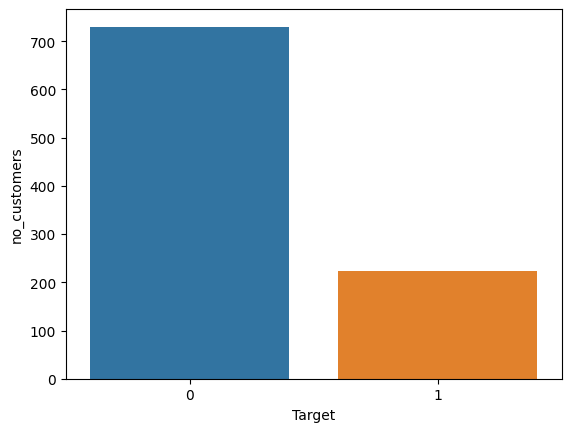

In [ ]:
#Explore No. of customers by Target

df_noCust_by_target = df.groupby(by=['Target']).agg(
          no_customers=('Target','count')).reset_index()

sns.barplot(data=df_noCust_by_target, x='Target', y='no_customers')
plt.show()

### Cat-Cat


<ipython-input-43-1dce71becfdf>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target', 'count')).reset_index().pivot(column1, 'Target', 'no_customers')


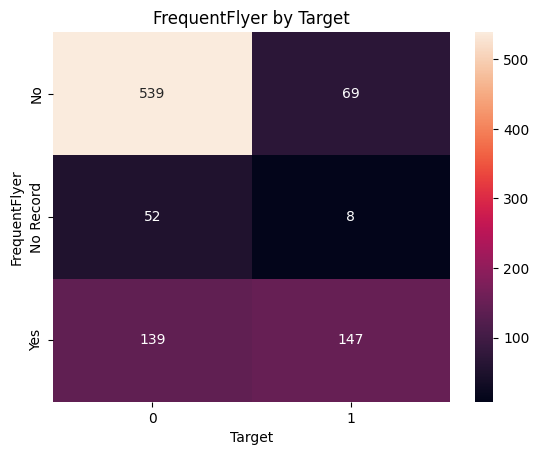

<ipython-input-43-1dce71becfdf>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target', 'count')).reset_index().pivot(column1, 'Target', 'no_customers')


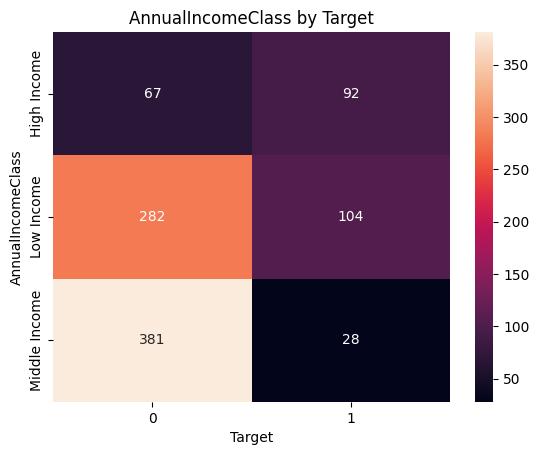

<ipython-input-43-1dce71becfdf>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target', 'count')).reset_index().pivot(column1, 'Target', 'no_customers')


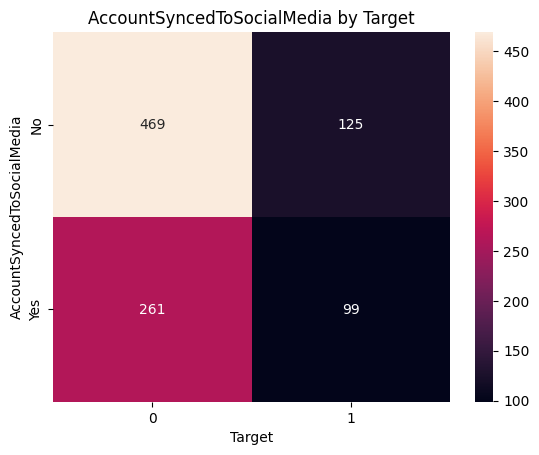

<ipython-input-43-1dce71becfdf>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Target', 'count')).reset_index().pivot(column1, 'Target', 'no_customers')


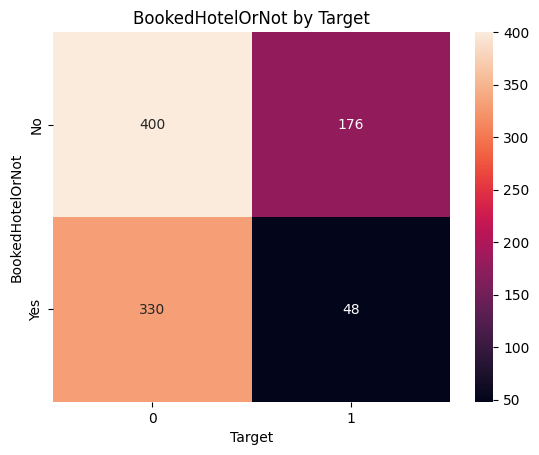

In [ ]:
#Explore cat by Target
#Function to create a heatmap for categorical columns
def create_heatmap(dataframe, column1, column2):
    df_by_target = dataframe.groupby([column1, 'Target']).agg(
                          no_customers=('Target', 'count')).reset_index().pivot(column1, 'Target', 'no_customers')

    sns.heatmap(df_by_target, annot=True, fmt='.0f')

# Iterate over the categorical columns and create heatmaps
for column in categorical_vars:
    create_heatmap(df, column, 'Target')
    plt.title(f"{column} by Target")
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

In [ ]:
from scipy.stats import chi2_contingency

chi2_results = {}

for column in categorical_vars:
    contingency_table = pd.crosstab(df[column], df['Target'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p_value': p_value}

# Print the results
for column, result in chi2_results.items():
    print(f"Chi-square test result for {column}:")
    print(f"Chi-square statistic: {result['chi2']}")
    print(f"P-value: {result['p_value']}")
    print()

Chi-square test result for FrequentFlyer:
Chi-square statistic: 177.31352216788935
P-value: 3.139481135589427e-39

Chi-square test result for AnnualIncomeClass:
Chi-square statistic: 170.1731711287906
P-value: 1.115232469922444e-37

Chi-square test result for AccountSyncedToSocialMedia:
Chi-square statistic: 4.847119048545631
P-value: 0.02769234783014265

Chi-square test result for BookedHotelOrNot:
Chi-square statistic: 39.517869032512394
P-value: 3.2507122637689385e-10



#Data Processing

In [ ]:
cat_data = pd.DataFrame()


df['AnnualIncomeClass'] = df['AnnualIncomeClass'].map({'Low Income':0,
                             'Middle Income':1,
                             'High Income':2})

cat_data = pd.concat([cat_data, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')], axis=1)

cat_data = pd.concat([cat_data, pd.get_dummies(df['AnnualIncomeClass'], prefix='AnnualIncomeClass')], axis=1)

cat_data = pd.concat([cat_data, df['AnnualIncomeClass']], axis=1)
cat_data

,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_0,AnnualIncomeClass_1,AnnualIncomeClass_2,AnnualIncomeClass
0,1,0,0,0,1,0,1
1,0,0,1,1,0,0,0
2,1,0,0,0,1,0,1
3,1,0,0,0,1,0,1
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
949,0,0,1,1,0,0,0
950,1,0,0,0,1,0,1
951,1,0,0,0,1,0,1
952,1,0,0,1,0,0,0


In [ ]:
X = pd.concat([df[['Age', 'ServicesOpted']], cat_data], axis=1)
y = df['Target']

##Model Creation and Evaluation

In [ ]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

#fixing imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [ ]:
class ModelEvaluator:
    def __init__(self, models,X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    #Create Generic function to fit data and display results/predictions
    #clf = classifer
    def fit_evaluate(self):
        results = []

        for model_name, model in self.models.items():
          samplers = {'no_sampler':'none',
            'Under_Sampler': RandomUnderSampler(random_state=0),
            'Over_Sampler': RandomOverSampler(random_state=0),
            'SMOTE_Sampler': SMOTE(random_state=0),
          }


          for sampler_name, sampler in samplers.items():
            if sampler != 'none':
              sampler.fit(self.X_train, self.y_train)
              X_trainS, y_trainS = sampler.fit_resample(self.X_train, self.y_train)
            else:
              X_trainS = self.X_train
              y_trainS = self.y_train

            # fit model to training data
            model.fit(X_trainS, y_trainS)

            # make predictions for train data
            y_pred_train = model.predict(X_trainS)

            # make predictions for test data
            y_pred_test = model.predict(self.X_test)
            # print evaluation
            print(classification_report(self.y_test, y_pred_test))

            # Calculate F1 score
            f1 = f1_score(self.y_test, y_pred_test)
            precision = precision_score(self.y_test, y_pred_test)
            recall = recall_score(self.y_test, y_pred_test)

            results.append({'Model': model_name, 'Sampler': sampler_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
            print(f'Model: {model_name}, Sampler: {sampler_name}')
            print('\nConfusion Matrix: \n')
            s = sns.heatmap(confusion_matrix(self.y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
            s.set(xlabel='Predicted class', ylabel='True class')
            plt.show()

            fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_trainS)
            auc_train = roc_auc_score(y_pred_train, y_trainS)
            plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')
            fpr_test, tpr_test, _ = roc_curve(y_pred_test,  self.y_test)
            auc_test = roc_auc_score(y_pred_test, self.y_test)
            plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.legend(loc=4)
            plt.show()
        return pd.DataFrame(results)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       291
           1       0.68      0.44      0.53        91

    accuracy                           0.82       382
   macro avg       0.76      0.69      0.71       382
weighted avg       0.80      0.82      0.80       382

Model: Logistic Regression, Sampler: no_sampler

Confusion Matrix: 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


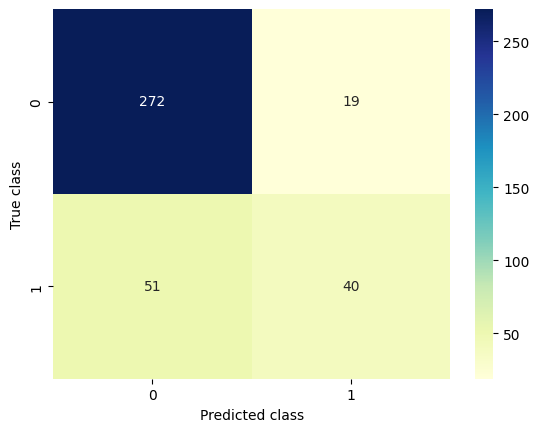

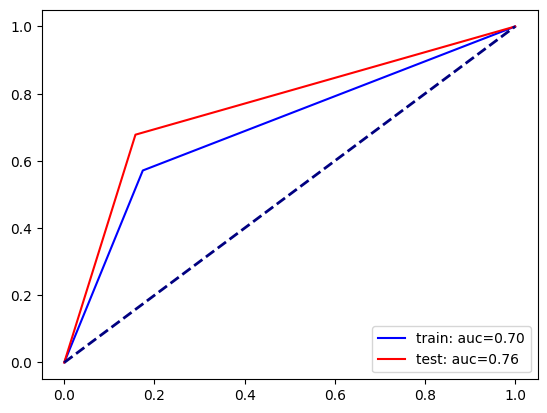

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       291
           1       0.49      0.79      0.60        91

    accuracy                           0.75       382
   macro avg       0.70      0.77      0.71       382
weighted avg       0.82      0.75      0.77       382

Model: Logistic Regression, Sampler: Under_Sampler

Confusion Matrix: 



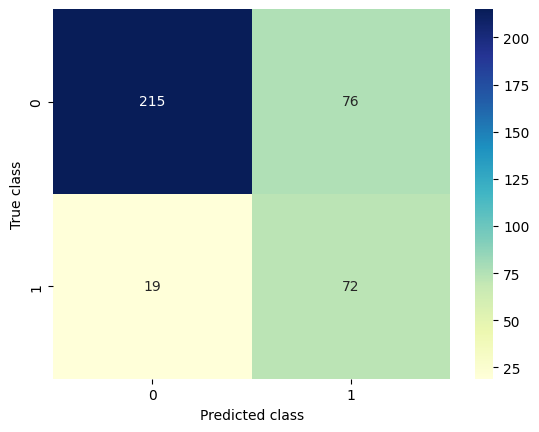

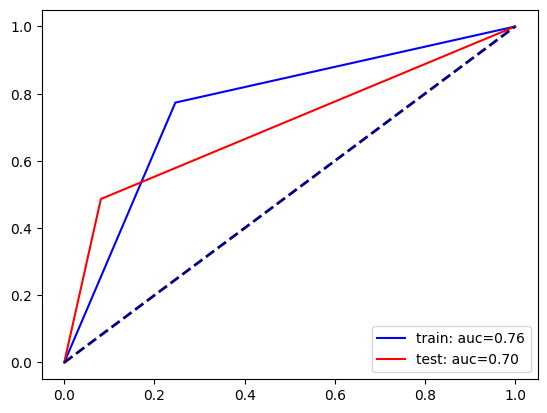

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       291
           1       0.51      0.79      0.62        91

    accuracy                           0.77       382
   macro avg       0.72      0.78      0.73       382
weighted avg       0.82      0.77      0.78       382

Model: Logistic Regression, Sampler: Over_Sampler

Confusion Matrix: 



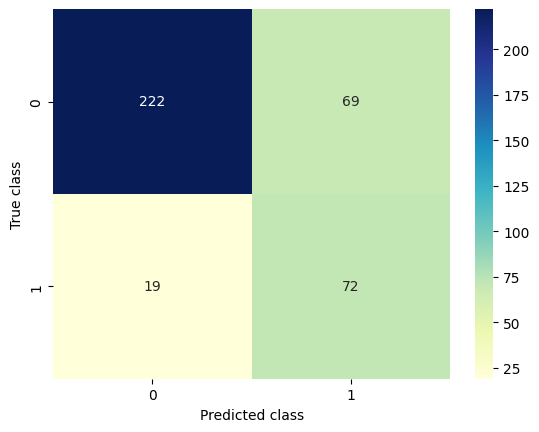

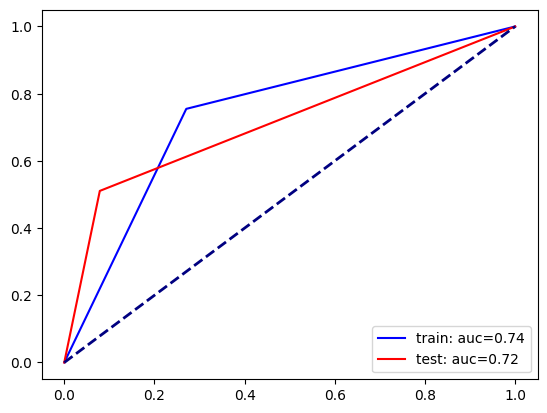

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.80      0.85       291
           1       0.54      0.74      0.62        91

    accuracy                           0.79       382
   macro avg       0.72      0.77      0.74       382
weighted avg       0.82      0.79      0.80       382

Model: Logistic Regression, Sampler: SMOTE_Sampler

Confusion Matrix: 



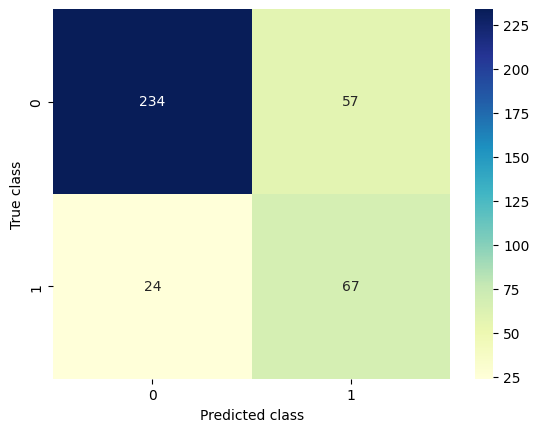

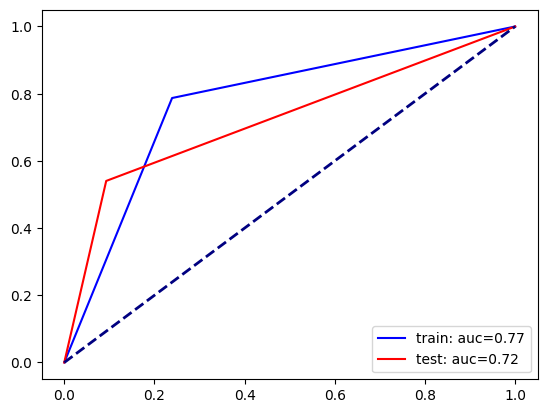

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       291
           1       0.70      0.65      0.67        91

    accuracy                           0.85       382
   macro avg       0.80      0.78      0.79       382
weighted avg       0.85      0.85      0.85       382

Model: Random Forest, Sampler: no_sampler

Confusion Matrix: 



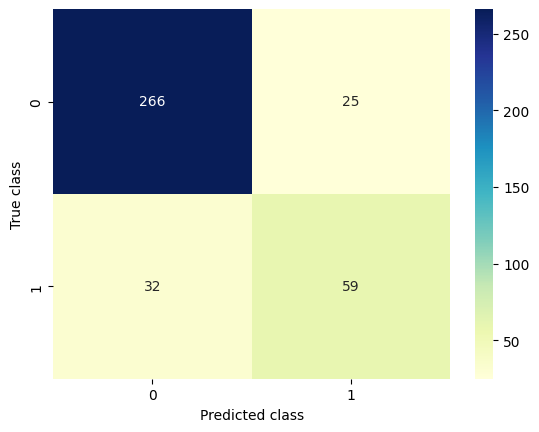

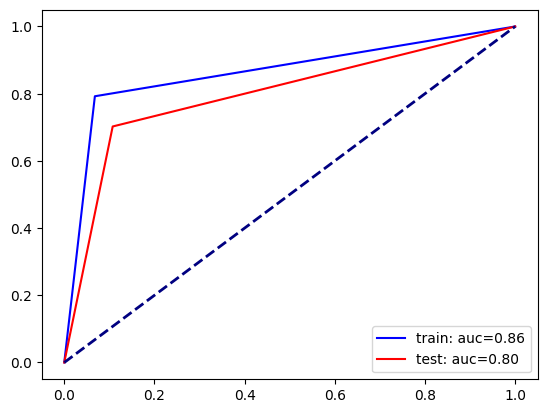

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       291
           1       0.52      0.89      0.66        91

    accuracy                           0.78       382
   macro avg       0.74      0.82      0.75       382
weighted avg       0.85      0.78      0.80       382

Model: Random Forest, Sampler: Under_Sampler

Confusion Matrix: 



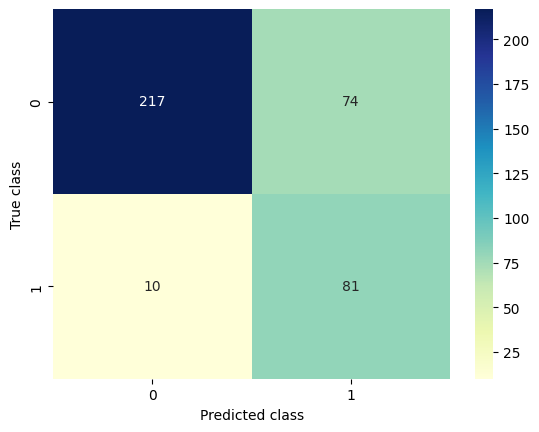

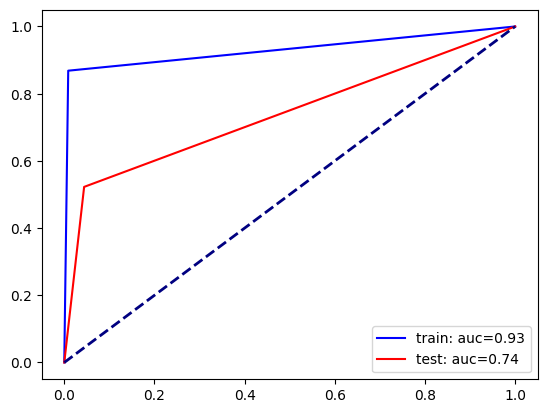

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       291
           1       0.57      0.80      0.67        91

    accuracy                           0.81       382
   macro avg       0.75      0.81      0.77       382
weighted avg       0.84      0.81      0.82       382

Model: Random Forest, Sampler: Over_Sampler

Confusion Matrix: 



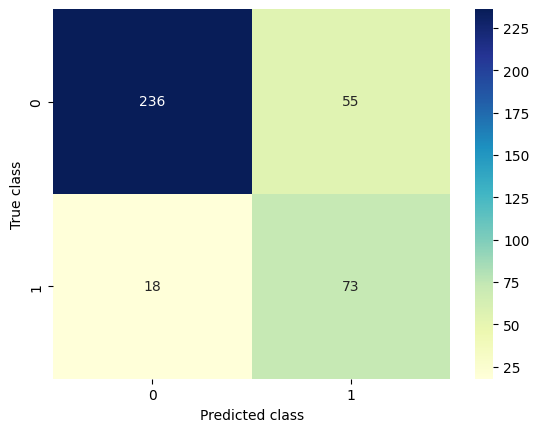

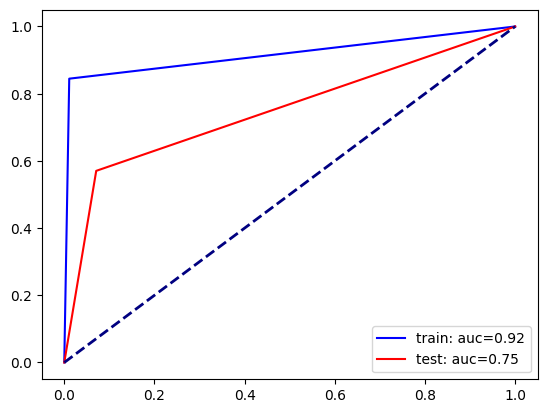

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       291
           1       0.61      0.78      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.81      0.78       382
weighted avg       0.85      0.83      0.84       382

Model: Random Forest, Sampler: SMOTE_Sampler

Confusion Matrix: 



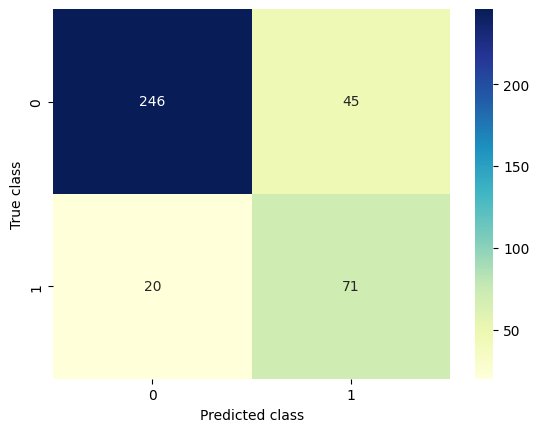

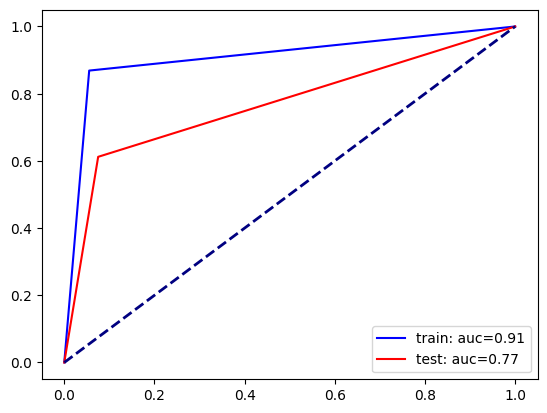

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       291
           1       0.76      0.60      0.67        91

    accuracy                           0.86       382
   macro avg       0.82      0.77      0.79       382
weighted avg       0.86      0.86      0.86       382

Model: KNeighbors, Sampler: no_sampler

Confusion Matrix: 



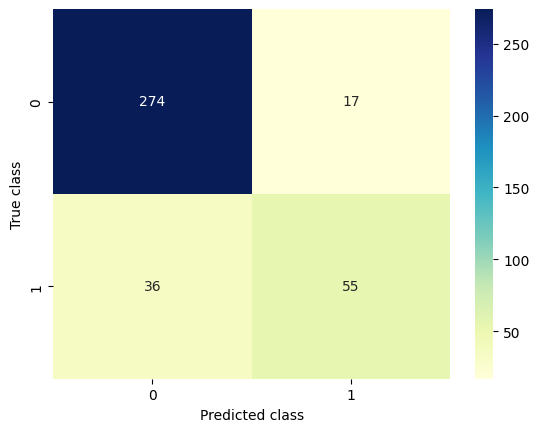

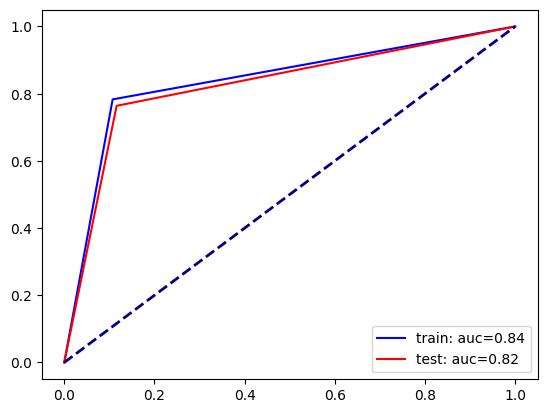

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       291
           1       0.46      0.84      0.60        91

    accuracy                           0.73       382
   macro avg       0.70      0.77      0.70       382
weighted avg       0.82      0.73      0.75       382

Model: KNeighbors, Sampler: Under_Sampler

Confusion Matrix: 



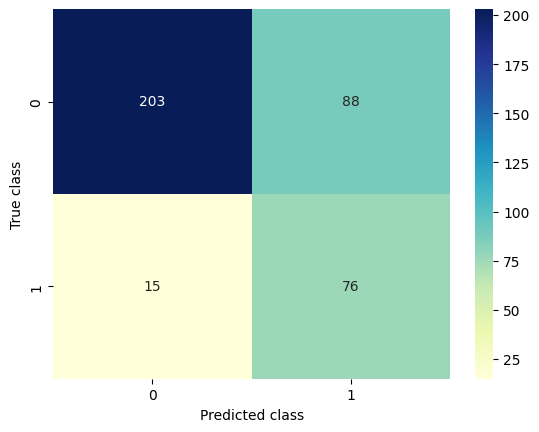

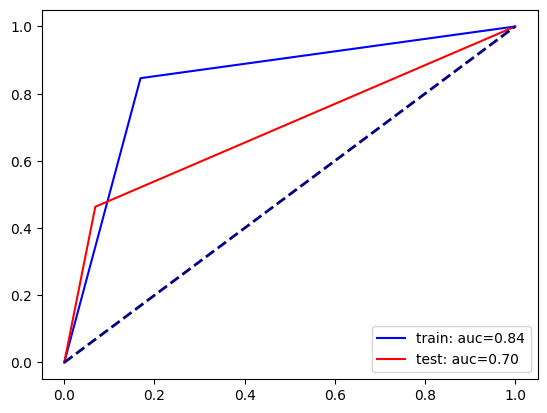

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       291
           1       0.60      0.75      0.66        91

    accuracy                           0.82       382
   macro avg       0.76      0.79      0.77       382
weighted avg       0.84      0.82      0.83       382

Model: KNeighbors, Sampler: Over_Sampler

Confusion Matrix: 



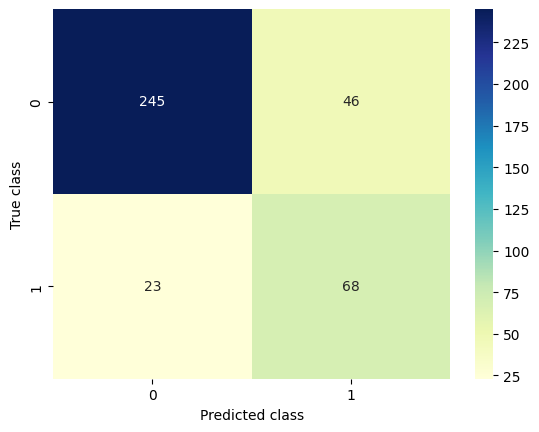

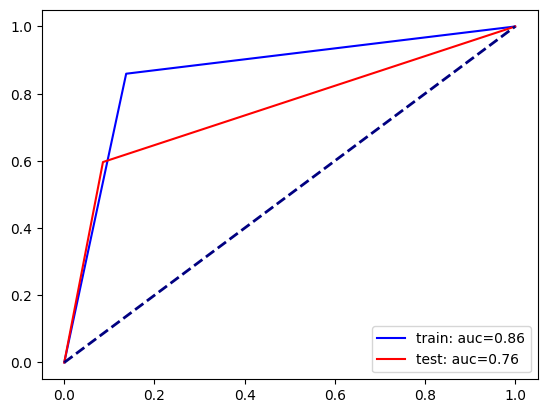

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       291
           1       0.62      0.69      0.66        91

    accuracy                           0.83       382
   macro avg       0.76      0.78      0.77       382
weighted avg       0.83      0.83      0.83       382

Model: KNeighbors, Sampler: SMOTE_Sampler

Confusion Matrix: 



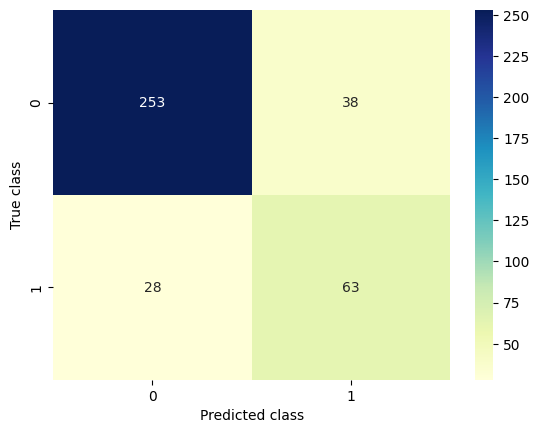

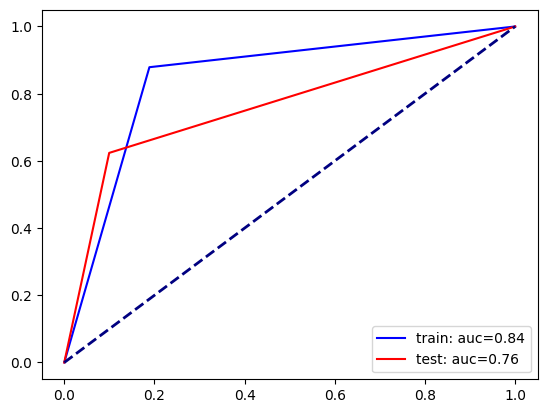

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       291
           1       0.77      0.64      0.70        91

    accuracy                           0.87       382
   macro avg       0.83      0.79      0.81       382
weighted avg       0.86      0.87      0.86       382

Model: XGBoost, Sampler: no_sampler

Confusion Matrix: 



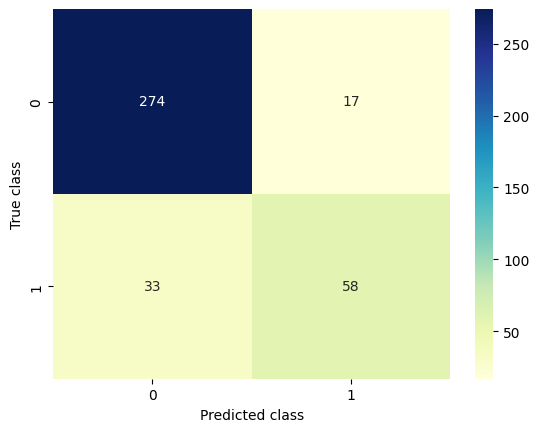

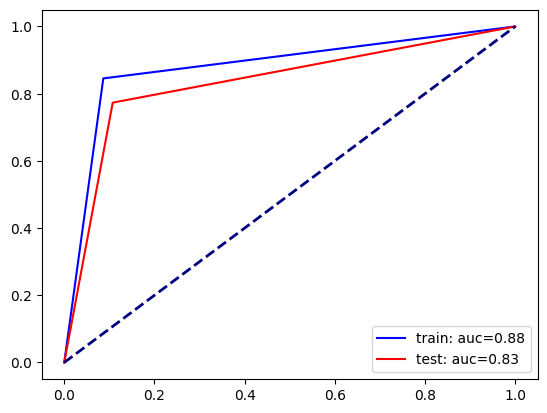

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       291
           1       0.53      0.82      0.64        91

    accuracy                           0.78       382
   macro avg       0.73      0.80      0.74       382
weighted avg       0.84      0.78      0.80       382

Model: XGBoost, Sampler: Under_Sampler

Confusion Matrix: 



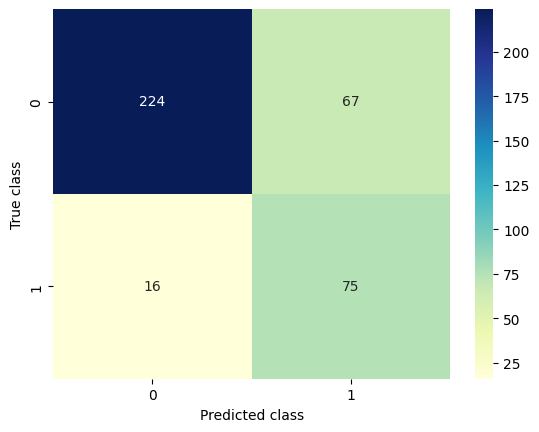

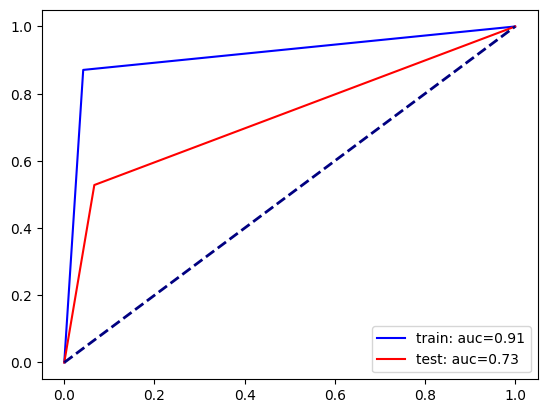

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       291
           1       0.60      0.82      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.83      0.79       382
weighted avg       0.86      0.83      0.84       382

Model: XGBoost, Sampler: Over_Sampler

Confusion Matrix: 



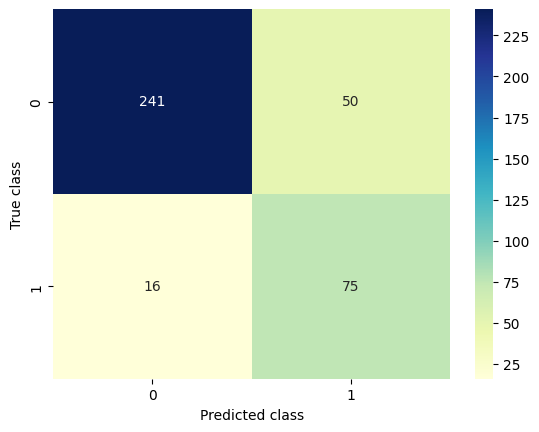

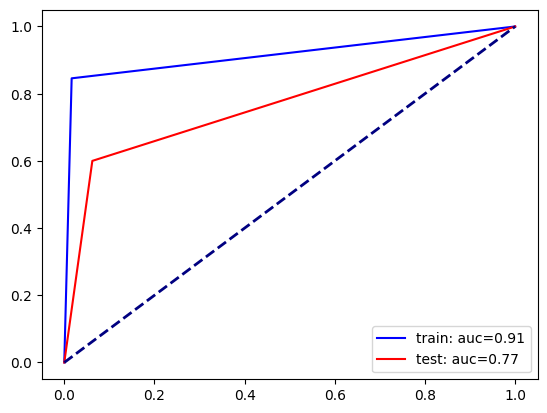

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       291
           1       0.62      0.78      0.69        91

    accuracy                           0.83       382
   macro avg       0.77      0.81      0.79       382
weighted avg       0.85      0.83      0.84       382

Model: XGBoost, Sampler: SMOTE_Sampler

Confusion Matrix: 



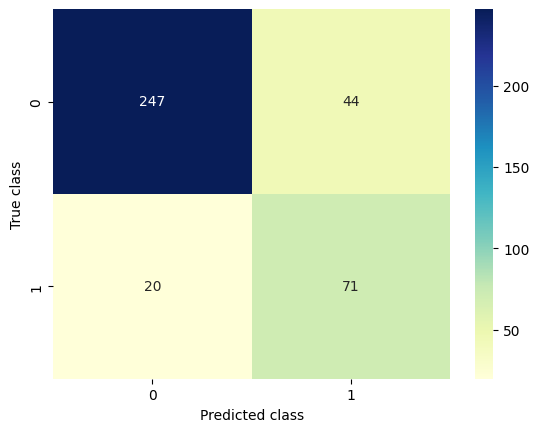

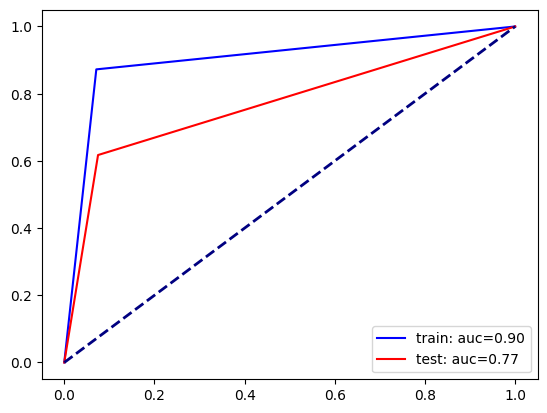

                  Model        Sampler  Precision    Recall  F1 Score
0   Logistic Regression     no_sampler   0.677966  0.439560  0.533333
1   Logistic Regression  Under_Sampler   0.486486  0.791209  0.602510
2   Logistic Regression   Over_Sampler   0.510638  0.791209  0.620690
3   Logistic Regression  SMOTE_Sampler   0.540323  0.736264  0.623256
4         Random Forest     no_sampler   0.702381  0.648352  0.674286
5         Random Forest  Under_Sampler   0.522581  0.890110  0.658537
6         Random Forest   Over_Sampler   0.570312  0.802198  0.666667
7         Random Forest  SMOTE_Sampler   0.612069  0.780220  0.685990
8            KNeighbors     no_sampler   0.763889  0.604396  0.674847
9            KNeighbors  Under_Sampler   0.463415  0.835165  0.596078
10           KNeighbors   Over_Sampler   0.596491  0.747253  0.663415
11           KNeighbors  SMOTE_Sampler   0.623762  0.692308  0.656250
12              XGBoost     no_sampler   0.773333  0.637363  0.698795
13              XGBo

In [ ]:
# Specify the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}
evaluator = ModelEvaluator(models,X_train, X_test, y_train, y_test)
results = evaluator.fit_evaluate()
print(results)

#Result

##Merge result

In [ ]:
# Instantiate the XGBoost model
model = xgb.XGBClassifier()

# Apply nosampling to the training data
nosampler = RandomOverSampler(random_state=0)
X_train_nosampler, y_train_nosampler = nosampler.fit_resample(X_train, y_train)

# Fit the model to the resampled training data
model.fit(X_train_nosampler, y_train_nosampler)

# Make predictions for the train data
y_pred_train = model.predict(X_train)

# Make predictions for the test data
y_pred_test = model.predict(X_test)

# Create new columns in the original DataFrame df to store the predictions
df.loc[X_train.index, 'Prediction_train'] = y_pred_train
df.loc[X_test.index, 'Prediction_test'] = y_pred_test

In [ ]:
df

,Target,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,avgAge,avgServicesOpted,Prediction_train,Prediction_test
0,0,34,No,1,6,No,Yes,32.352055,2.402740,NaN,0.0
1,1,34,Yes,0,5,Yes,No,31.316964,2.549107,1.0,NaN
2,0,37,No,1,3,Yes,No,32.352055,2.402740,NaN,0.0
3,0,30,No,1,2,No,No,32.352055,2.402740,0.0,NaN
4,0,30,No,0,1,No,No,32.352055,2.402740,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
949,0,31,Yes,0,1,No,No,32.352055,2.402740,NaN,0.0
950,0,30,No,1,5,No,Yes,32.352055,2.402740,0.0,NaN
951,0,37,No,1,4,No,No,32.352055,2.402740,NaN,0.0
952,0,30,No,0,1,Yes,Yes,32.352055,2.402740,NaN,0.0


##Feature importance

In [ ]:
# Get the feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({'Feature': X_train_nosampler.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(importance_df)

Feature Importance:
                   Feature  Importance
4        FrequentFlyer_Yes    0.694256
6      AnnualIncomeClass_1    0.084862
1            ServicesOpted    0.081300
5      AnnualIncomeClass_0    0.052725
0                      Age    0.043829
2         FrequentFlyer_No    0.020924
3  FrequentFlyer_No Record    0.016763
7      AnnualIncomeClass_2    0.005341
8        AnnualIncomeClass    0.000000


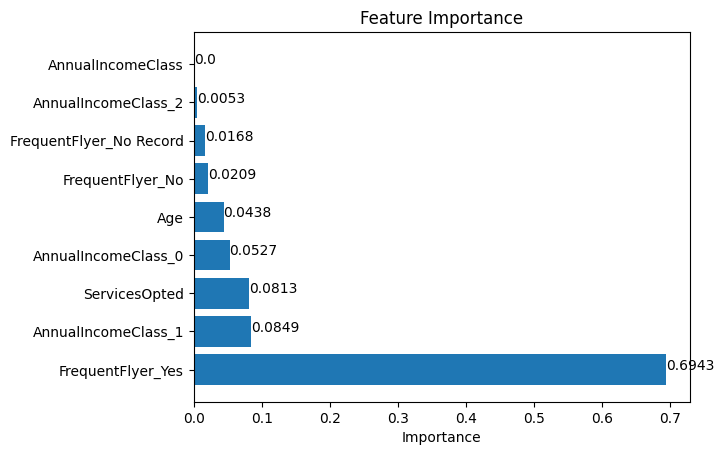

In [ ]:
# Create a horizontal bar plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')

# Add value annotations to the end of each bar
for i, v in enumerate(importance_df['Importance']):
    plt.text(v, i, str(round(v, 4)), color='black')

# Show the plot
plt.show()